Best hyperparameter combinations based on minimum train loss:
                                            folder  min_train_loss  \
12   results_lr0.0005_bs64_hd128_nl3_nh4_cd512_k16        0.003686   
15   results_lr0.0005_bs64_hd128_nl3_nh16_cd16_k16        0.003715   
4     results_lr0.0005_bs64_hd128_nl3_nh4_cd16_k16        0.003769   
6     results_lr0.0005_bs64_hd128_nl3_nh4_cd64_k16        0.003841   
8    results_lr0.0005_bs64_hd128_nl5_nh4_cd512_k16        0.004087   
13    results_lr0.0005_bs64_hd128_nl5_nh4_cd16_k16        0.004095   
14    results_lr0.0005_bs64_hd128_nl5_nh4_cd64_k16        0.004143   
3    results_lr0.0005_bs64_hd128_nl5_nh16_cd16_k16        0.004143   
17    results_lr0.0005_bs64_hd128_nl3_nh4_cd64_k32        0.004263   
9   results_lr0.0005_bs64_hd128_nl3_nh16_cd512_k16        0.004300   
16    results_lr0.0005_bs64_hd128_nl5_nh4_cd64_k32        0.004689   
11    results_lr0.0005_bs64_hd128_nl5_nh4_cd16_k32        0.004761   
7     results_lr0.0005_bs64_

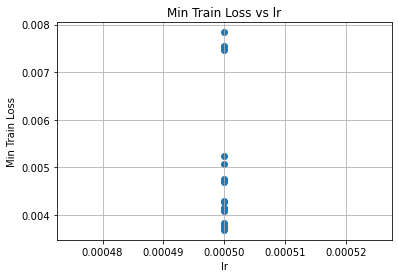

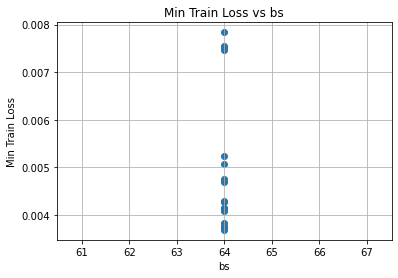

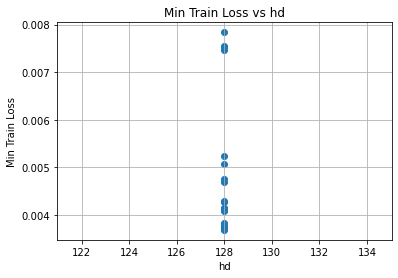

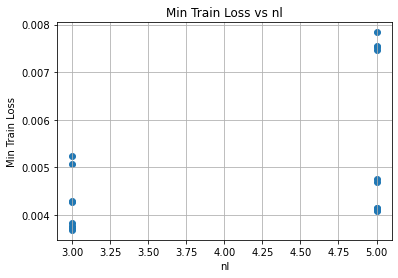

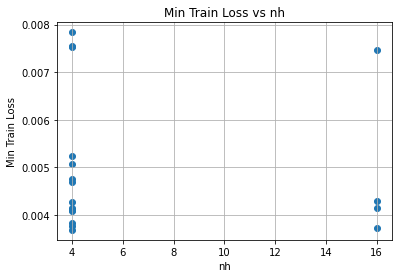

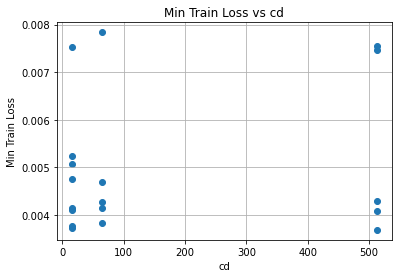

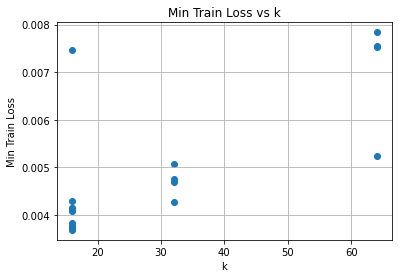

In [12]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

# Path to the main results directory
base_dir = "/vols/cms/er421/hgcal/code/code/Mixed/LC/HyperGAT/results"

# List to hold the data from each run
data_rows = []

# Loop over each subfolder in the base directory
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        # Construct the CSV file path (file has the same name as the folder with a .csv extension)
        csv_file = os.path.join(folder_path, folder + ".csv")
        if os.path.exists(csv_file):
            # Load the CSV file
            df = pd.read_csv(csv_file)
            df['train_loss'] = pd.to_numeric(df['train_loss'], errors='coerce')
            df = df.dropna(subset=['train_loss'])
            if df['train_loss'].dropna().empty:
                # Skip this folder/run if no valid train_loss values exist
                continue
            else:


                # Find the minimum train_loss and its corresponding epoch
                min_train_loss = df['train_loss'].min()
                best_epoch = int(df.loc[df['train_loss'].idxmin(), 'epoch'])
            
            # Extract hyperparameters from the folder name
            # Remove the "results_" prefix if present
            hp_string = folder[len("results_"):] if folder.startswith("results_") else folder
            # Each hyperparameter is separated by an underscore
            tokens = hp_string.split("_")
            hp_dict = {}
            for token in tokens:
                # Use regex to split token into a parameter key and its value (e.g. "lr0.0001" -> key="lr", value="0.0001")
                m = re.match(r"([a-zA-Z]+)([\d\.]+)", token)
                if m:
                    key = m.group(1)
                    value = m.group(2)
                    # Convert value to a float or int as appropriate
                    if '.' in value:
                        value = float(value)
                    else:
                        value = int(value)
                    hp_dict[key] = value
            
            # Build the row with folder name, best metrics, and hyperparameters
            row = {
                'folder': folder,
                'min_train_loss': min_train_loss,
                'best_epoch': best_epoch
            }
            row.update(hp_dict)
            data_rows.append(row)

# Create a DataFrame from the results
results_df = pd.DataFrame(data_rows)

# Sort the DataFrame by minimum training loss (lowest first)
results_df_sorted = results_df.sort_values(by="min_train_loss", ascending=True)
print("Best hyperparameter combinations based on minimum train loss:")
print(results_df_sorted)

# Plotting: Create a scatter plot for each hyperparameter vs. the min_train_loss
# Exclude non-hyperparameter columns
exclude_cols = ['folder', 'min_train_loss', 'best_epoch']
hyperparam_columns = [col for col in results_df_sorted.columns if col not in exclude_cols]

for param in hyperparam_columns:
    plt.figure()
    plt.scatter(results_df_sorted[param], results_df_sorted['min_train_loss'])
    plt.xlabel(param)
    plt.ylabel('Min Train Loss')
    plt.title(f'Min Train Loss vs {param}')
    plt.grid(True)
    plt.show()
